In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.85
Loading CCF brain structure data...
Loading time: 0.00


### seu_ns: SEU-Allen's data
### all_ns: SEU + Janelia's data

Input .swc data file, total **1602**.

ns = nmt.neuron_set('/home/penglab/FeaCal/allData')
pickle.dump([ns], open("/home/penglab/FeaCal/all_ns.pickle", "wb"))

In [2]:
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


# 2.1) Distribution of soma location
* Set the *thre* value to determine the threshold for showing the region distribution

## # Previous Version: Using Bar plot to show the distribution

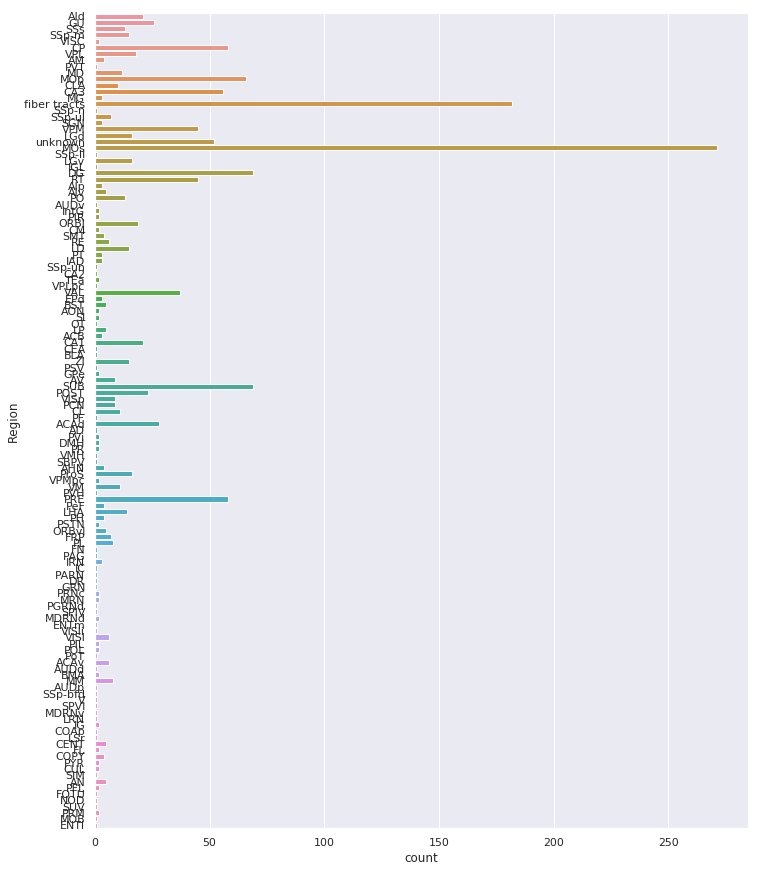

In [3]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(11.7,15)})
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>thre])],
                 )


## 2.1.1) Based on 7 regions
* including Isocortex, OLF, HPF, CTXsp, CNU, BS, CB; 

In [4]:

mouseDF = pd.read_excel('/home/penglab/FeaCal/dataSource/mouseDF.xlsx',index=0)
abbrlist = []
for i in mouseDF.loc[:,'idx']:
    if i in nmt.bs.level.index:
        abbr = nmt.bs.level.loc[i,'Abbreviation']
        abbrlist.append(abbr)
    else:
        print(i)
        abbrlist.append('unknown')
mouseDF.loc[:,'ABBR']=abbrlist
del mouseDF[1]
mouseDF.set_index(['idx'],inplace=True)

somaRegDF = ns.features['soma_features'].region.copy()
large_list = [ 'BS', 'CB','CNU', 'CTXsp', 'HPF','Isocortex', 'OLF']
mouseDF['FatherRe'] = mouseDF.loc[:,'ABBR']
        
for B_iter in large_list :
    temp=[]
    if nmt.bs.name_to_id(B_iter) in mouseDF.index:
        for child_iter in mouseDF.loc[nmt.bs.name_to_id(B_iter),'Child ID'].split():
            if int(child_iter) in mouseDF.index:
                mouseDF.loc[int(child_iter),'FatherRe'] = B_iter
            else:
                print(child_iter)
            #temp.append(nmt.bs.level.loc[int(child_iter),'Abbrevation'])
somaRegDF['main7Region'] = somaRegDF['Region']     
for iterR in somaRegDF.index:
    if somaRegDF.loc[iterR,'Region'] in mouseDF['ABBR'].tolist():
        somaRegDF.loc[iterR,'main7Region'] = mouseDF[mouseDF['ABBR']==somaRegDF.loc[iterR,'Region']].iloc[0,-1]

,Hemisphere,Region,main7Region,Cluster
17302_00001,2,AId,Isocortex,Isocortex
17302_00002,2,AId,Isocortex,Isocortex
17302_00003,2,GU,Isocortex,Isocortex
17302_00005,2,GU,Isocortex,Isocortex
17302_00006,2,GU,Isocortex,Isocortex
17302_00007,2,GU,Isocortex,Isocortex
17302_00009,2,GU,Isocortex,Isocortex
17302_00010,2,SSs,Isocortex,Isocortex
17302_00011,2,SSs,Isocortex,Isocortex
17302_00013,2,SSs,Isocortex,Isocortex


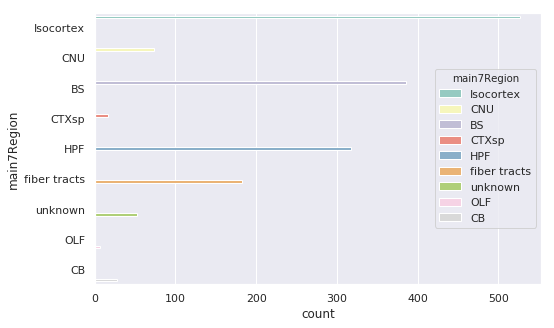

In [5]:
ct = somaRegDF["main7Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(8,5)})
_ = sns.countplot(y="main7Region", 
                  data=somaRegDF.loc[somaRegDF.main7Region.isin(ct.index[ct>thre])],
                  hue = "main7Region", palette="Set3"
                 )


## 2.1.2) Projecting to three directions: "Horizontal","Coronal","Sagittal"

### By setting color="majorSOMA" in cell_in_map, the soma point will be shown with 7 major regions
* Here set the 'Cluster' column in ns.metadata to be the region name.


### By setting color="soma" in cell_in_map, the soma point will be shown with 256 colors
* No need to set the 'Cluster' column in ns.metadata to be the region name.

### Plot three views in a single plot
from neuro_morpho_toolbox.plot import cell_in_map

fig, ax = plt.subplots(3,1, figsize=(7.5, 27))

cur_list = ns.metadata.index.tolist()
cell_in_map(ns.neurons, 
            cur_list, ns.metadata, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="soma",
            alpha=1,
            ax=ax[0]
           )
cell_in_map(ns.neurons, 
            cur_list, ns.metadata, 
            ccf_annotation=nmt.annotation, 
            view="Coronal", 
            color="soma",
            alpha=1,
            ax=ax[1]
           )
cell_in_map(ns.neurons, 
            cur_list, ns.metadata, 
            ccf_annotation=nmt.annotation, 
            view="Sagittal", 
            color="soma",
            alpha=1,
            ax=ax[2]
           )
#fig.savefig('../Figure/Cell_in_map.pdf')

### Plot singel view('Horizontal') with only 7 major regions

Illustrating soma locations inside a brain from horizontal view:


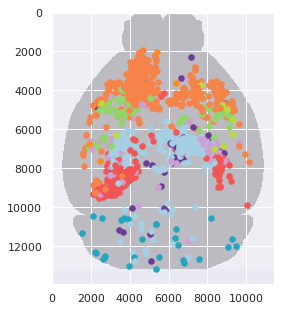

In [6]:
from neuro_morpho_toolbox.plot import cell_in_map
fig, ax =  plt.subplots(1,1)
cur_list = ns.metadata.index.tolist()
somaRegDF['Cluster']= somaRegDF.loc[:,'main7Region']
somaRegDF
cell_in_map(ns.neurons, 
            cur_list, somaRegDF, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="majorsoma",
            ax=ax
           )
#fig.savefig('/home/penglab/FeaCal/horizonsaved')

### Plot singel view('Horizontal') with all regions

Illustrating soma locations inside a brain from horizontal view:


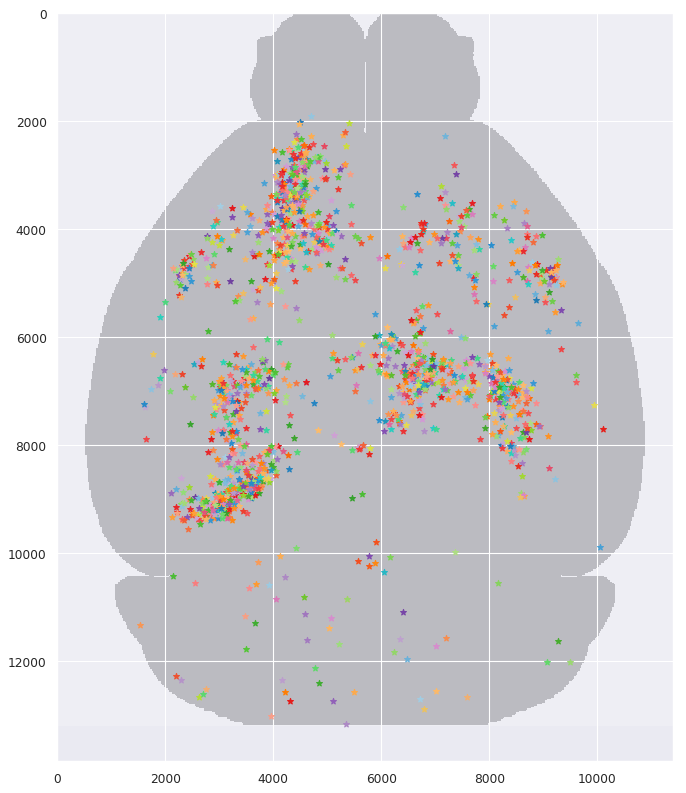

In [30]:
from neuro_morpho_toolbox.plot import cell_in_map

#fig, ax =  plt.subplots(4,4)
cur_list = ns.metadata.index.tolist()

somaRegDF
cell_in_map(ns.neurons, 
            cur_list, ns.metadata, 
            ccf_annotation=nmt.annotation, 
            view="Horizontal", 
            color="soma"
            #,ax=axsomaRegDF
           )
#fig.savefig('/home/penglab/FeaCal/horizonsaved')

## 2.1.3) Use wordcloud to illustrate the information

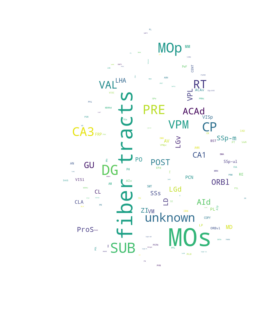

In [63]:
import jieba               
from wordcloud import WordCloud   #import the package

region_all, count = np.unique(somaRegDF['Region'], return_counts=True)
somaDIC = {}
for i in range(len(region_all)):
    #if region_all[i] == 'fiber tracts':
        #continue
    somaDIC[region_all[i]] = count[i]
wc = WordCloud(background_color='white',width=240,height=160,max_font_size=75,min_font_size=5,
               colormap="viridis", mask = img)
wc.generate_from_frequencies(somaDIC)
#save the file
wc.to_file('/home/penglab/Desktop/WC.png') 
# Show the plot
plt.figure() 
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()


## Analyze soma location to obtain confident list

### Read the downsample-25 array with selected CCF region

In [67]:
pickle_in = open("/home/penglab/NMTcode/ccf_25.pickle","rb")
example_ = pickle.load(pickle_in)
ccfArray= example_[0]

### Read the 6-nearest neighbor 0-1 Contour Matrix 

In [68]:
pickle_in = open("/home/penglab/NMTcode/CCF_6_01.pickle","rb")
example_ = pickle.load(pickle_in)
CCF_6_01= example_[0]==1

### Read the 6-nearest neighbor Contour Matrix with CCF index on

Originally, CCF has 316 regions, after using all the CCF index to replace the child region, there are 337 regions/
Besides, there are 23 regions that show up in the nrrd array but have not been mentioned in CCF or its child region

In [69]:
pickle_in = open("/home/penglab/NMTcode/CCF_6_M.pickle","rb")
example_ = pickle.load(pickle_in)
CCF_6_M = example_[0]

### function disCal(SOMA_raw,Contour_Matrix, flipF = True, near_n)

calculate the distance among region contour, record the nearest near_n
* **SOMA_raw** input dataframe of soma feature: 
* **Contour_Matrix** =1 for contour points, = 0 for others
* **near_n** number of closest contour points to record
* **flipF** flag to indicate whether flip the soma location or not. Defalt is True

Return
* DataFrame with columns ['x', 'y', 'z', 'SqEuclidean', 'min_Euclidean']



In [70]:
from scipy.spatial import distance
import ast
import time
def disCal(SOMA_raw,Contour_01,Array_ID, near_n, flipF = True):
    assert near_n>0, "The number of nearest contour points should be bigger than 0"
    start = time.time()
    scaledDF = pd.DataFrame()
    scaledDF["x"] = (SOMA_raw["x"] / nmt.annotation.space["x"]).copy()
    scaledDF["y"] = (SOMA_raw["y"] / nmt.annotation.space["y"]).copy()
    scaledDF["z"] = (SOMA_raw["z"] / nmt.annotation.space["z"]).copy()
    #flip the somalocation
    if flipF:
        scaledDF["z"][scaledDF['z']>(nmt.annotation.size["z"]//2)] = scaledDF["z"][scaledDF["z"]>(nmt.annotation.size['z']//2)] -nmt.annotation.size["z"]//2 
    i_p = 0
    for idx in scaledDF.index.tolist():
        i_p = i_p+1
        tempCoor = np.array([[scaledDF.loc[idx,'x'],scaledDF.loc[idx,'y'],scaledDF.loc[idx,'z']]])
        tempID = Array_ID[int(scaledDF.loc[idx,'x']),int(scaledDF.loc[idx,'y']),int(scaledDF.loc[idx,'z'])]
        coords = []
        if tempID == 0:
            scaledDF.loc[idx,'SqEuclidean'] = str([0])
            scaledDF.loc[idx,'min_Euclidean'] = 0.
            scaledDF.loc[idx,'mean_Euclidean'] = 0.
            continue
        Mask_temp = np.multiply(Array_ID == tempID,Contour_01)#Contour for this tempID
        co_1_temp,co_2_temp,co_3_temp = np.where( Mask_temp >0)
        for icoor in range(len(co_1_temp)):
            coords.append([co_1_temp[icoor], co_2_temp[icoor], co_3_temp[icoor]])
        zs = np.sort(distance.cdist(tempCoor,coords, 'sqeuclidean'))[0,0:min(near_n,distance.cdist(tempCoor,coords, 'sqeuclidean').shape[1])]
        scaledDF.loc[idx,'SqEuclidean'] = str(zs.tolist())
        scaledDF.loc[idx,'min_Euclidean'] = np.sqrt(float(scaledDF.loc[idx,'SqEuclidean'].strip('[]').split(",")[0]))
        scaledDF.loc[idx,'mean_Euclidean'] = np.mean(zs)
        if i_p%10 ==0:
            print('Load progress: %.5f'% (i_p/scaledDF.shape[0]))
    end = time.time()
    print("Total loading time: %.2f" % (end-start))
    scaledDF = scaledDF.fillna(str([0]))
    #scaledDF['min_Euclidean'] = scaledDF.min_Euclidean.astype(float)
    return scaledDF.copy()


In [71]:
somaDis = disCal(ns.features['soma_features'].raw_data,CCF_6_01,ccfArray,10 ,flipF = True)

Load progress: 0.00630
Load progress: 0.01260
Load progress: 0.01890
Load progress: 0.02520
Load progress: 0.03781
Load progress: 0.04411
Load progress: 0.05041
Load progress: 0.05671
Load progress: 0.06301
Load progress: 0.06931
Load progress: 0.07561
Load progress: 0.08192
Load progress: 0.08822
Load progress: 0.09452
Load progress: 0.10082
Load progress: 0.10712
Load progress: 0.11342
Load progress: 0.11972
Load progress: 0.13863
Load progress: 0.14493
Load progress: 0.15123
Load progress: 0.15753
Load progress: 0.16383
Load progress: 0.17013
Load progress: 0.17643
Load progress: 0.18273
Load progress: 0.18904
Load progress: 0.19534
Load progress: 0.20164
Load progress: 0.20794
Load progress: 0.21424
Load progress: 0.22054
Load progress: 0.22684
Load progress: 0.23314
Load progress: 0.23945
Load progress: 0.24575
Load progress: 0.25205
Load progress: 0.25835
Load progress: 0.26465
Load progress: 0.27095
Load progress: 0.27725
Load progress: 0.28355
Load progress: 0.28986
Load progre

In [65]:
pickle_in = open("/home/penglab/NMTcode/somaDis.pickle","rb")
example_ = pickle.load(pickle_in)
somaDis = example_[0]

In [72]:
selectedDF = somaDis[somaDis['SqEuclidean'] != str([0])].copy()

In [ ]:
se_list = selectedDF.index.tolist()

## Calculate ARI according to a given list

### Generate the dataframe using pickCLUSTERpara(method)

In [ ]:
from sklearn import metrics
from random import randrange
def pickCLUSTERpara(method,selected_list):
    if len(selected_list) >0:
        print('Will calculate ARI for '+ str(len(selected_list) ) + ' neurons')
    result_DF = pd.DataFrame()
    method_list = ['kmeans','snn','hdbscan','hierarchy','dbscan']
    assert method in method_list, "Should be one of "+str(method_list)
    colname = ['ARI','NumCluster','parameter']
    if method.lower() == 'hierarchy':
        #%% Store the result of Hierarchy
        result_hier = pd.DataFrame(columns = colname)
        L_method_list=['single', 'complete','average','weighted','centroid','median','ward']
        L_metric_list=['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
                       'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 
                       'mahalanobis', 'matching','minkowski','rogerstanimoto', 'russellrao',
                       'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

        criterionH_list=['inconsistent','distance','maxclust','monocrit','maxclust_monocrit']

        hier_dict={'L_method':'single', 'L_metric':'euclidean','criterionH':'inconsistent', 'depth':2,'R':None,
                   't':0.9,'optimal_ordering':False,'colR':3}
        for L_methodidx in L_method_list:
            hier_dict.update(L_method = L_methodidx)
            for L_metricidx in L_metric_list:
                hier_dict.update(L_metric = L_metricidx )
                # so far the parameter to generate the linkage array is set
                if L_methodidx == 'centroid' or L_methodidx == 'median' or L_methodidx == 'ward':
                    if L_metricidx != 'euclidean':
                        continue         
                for criterionidx in criterionH_list:
                    hier_dict.update(criterionH = criterionidx )   
                    if criterionidx == 'inconsistent' or criterionidx == 'distance':
                        for t_iter in  np.arange(0,1.6,0.05)  : 
                            hier_dict.update(t = t_iter) 
                            if criterionidx == 'inconsistent':
                                for depth_iter in range(2,16):
                                    hier_dict.update(depth = depth_iter) 
                                    _ = ns. get_clusters(method='Hierarchy',karg_dict=hier_dict)
                                    if len(selected_list)==0:
                                        selected_list = ns.metadata.index.tolist()
                                    tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                                    tempDF = pd.DataFrame([tempARI, 
                                                           len(list(ns.metadata.groupby('Cluster'))),
                                                           str(hier_dict)]).T.copy()
                                    tempDF.columns=colname
                                    print(str(hier_dict))
                                    result_hier = result_hier.append(tempDF) 
                            elif criterionidx == 'distance':
                                _ = ns. get_clusters(method='Hierarchy',karg_dict=hier_dict)
                                tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                                tempDF = pd.DataFrame([tempARI, 
                                                       len(list(ns.metadata.groupby('Cluster'))),
                                                       str(hier_dict)]).T.copy()
                                tempDF.columns=colname
                                print(str(hier_dict))
                                result_hier = result_hier.append(tempDF) 
                    if criterionidx == 'maxclust' or criterionidx == 'maxclust_monocrit':
                        for t_iter in  range(20,51): 
                            hier_dict.update(t = t_iter) 
                            _ = ns. get_clusters(method='Hierarchy',karg_dict=hier_dict)
                            tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                            tempDF = pd.DataFrame([tempARI, 
                                                   len(list(ns.metadata.groupby('Cluster'))),
                                                   str(hier_dict)]).T.copy()
                            tempDF.columns=colname
                            print(str(hier_dict))
                            result_hier = result_hier.append(tempDF) 
                               
        idx_hier = ['Hier'+str(x) for x in range(result_hier.shape[0])]    
        result_hier['idx'] = idx_hier
        result_hier.set_index('idx',inplace=True)  
        result_DF = result_hier.copy()
        
    if method.lower() == 'kmeans':
        result_kmeans = pd.DataFrame(columns = colname)
        init_list=['k-means++','random']
        algorithm_list = ['auto','full','elkan']
        precompute_distances_list = ['auto', True, False]
        n_init_list=['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
                       'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 
                       'mahalanobis', 'matching','minkowski','rogerstanimoto', 'russellrao',
                       'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']
        criterionH_list='inconsistent','distance','maxclust','monocrit','maxclust_monocrit'
        kmeans_dict={'n_clusters':20, 'init':'k-means++', 'n_init':10, 'max_iter':300, 'tol':0.0001,
                     'precompute_distances':'auto', 'verbose':0, 'random_state':None,'copy_x': True,
                     'n_jobs':12, 'algorithm':'auto'}
        for init_idx in init_list:
            kmeans_dict.update(init = init_idx)
            for algorithm_idx in algorithm_list:
                kmeans_dict.update(algorithm = algorithm_idx )
                for precompute_distances_idx in precompute_distances_list:
                    kmeans_dict.update(precompute_distances = precompute_distances_idx )
                    for n_clustersidx in range(3,45):
                        kmeans_dict.update(n_clusters = n_clustersidx)     
                        for n_initidx in range(7,15):
                            kmeans_dict.update(n_init = n_initidx) 
                            for tol_idx in np.exp(-np.arange(2,4,0.2)):
                                kmeans_dict.update(tol = tol_idx) 
                                print(kmeans_dict)
                                _ = ns. get_clusters(method='Kmeans',karg_dict=kmeans_dict)
                                tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                                tempDF = pd.DataFrame([tempARI, 
                                                       len(list(ns.metadata.groupby('Cluster'))),
                                                       str(kmeans_dict)]).T.copy()
                                tempDF.columns=colname
                                print(str(kmeans_dict))
                                result_kmeans = result_kmeans.append(tempDF)         
        idx_kmeans = ['KMeans'+str(x) for x in range(result_kmeans.shape[0])]    
        result_kmeans['idx'] = idx_kmeans
        result_kmeans.set_index('idx',inplace=True)       
        result_DF = result_kmeans.copy()
        
    if method.lower() == 'dbscan':
        result_dbscan = pd.DataFrame(columns = colname)
        algorithm_list = ['auto','ball_tree', 'kd_tree', 'brute']# 
         #
        metriclist = [ 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation','euclidean', 'cosine',
                      'dice','hamming', 'jaccard', 'kulsinski', 'matching','minkowski','rogerstanimoto','russellrao','sokalmichener', 'sokalsneath']
        dbscan_dict={'eps':20, 'min_samples':5, 'metric':'euclidean','metric_params':None, 'algorithm':'auto', 
                     'leaf_size':30, 'p':None,'n_jobs':12}
        for algorithm_idx in algorithm_list:
            dbscan_dict.update(algorithm = algorithm_idx )
            for metric_iter in metriclist:
                dbscan_dict.update(metric= metric_iter)
                if algorithm_idx == 'ball_tree' and metric_iter in ['correlation','cosine','sqeuclidean']:
                    continue
                if algorithm_idx == 'kd_tree' and metric_iter not in ['chebyshev', 'cityblock', 'euclidean',
                                                                                   'infinity', 'l1', 'l2', 'manhattan',
                                                                                  'minkowski', 'p']:
                    continue
                if algorithm_idx == 'brute' and metric_iter in ['haversine','wminkowski', 'mahalanobis','infinity']:
                    continue
                if metric_iter in ['wminkowski', 'minkowski']:
                    p_iter =randrange(1,10)
                    dbscan_dict.update(p = p_iter)
                    while metric_iter == 'minkowski' and p_iter == 1:
                        p_iter =randrange(2,10)
                        dbscan_dict.update(p = p_iter)
                for epsidx in np.exp(-np.arange(0,4,0.5)):
                    dbscan_dict.update(eps = epsidx)
                    for min_samples_iter in range(5,10):
                        dbscan_dict.update(min_samples = min_samples_iter)
                        for leaf_size_iter in range(25,35):
                            dbscan_dict.update(leaf_size = leaf_size_iter)
                            _ = ns. get_clusters(method='DBSCAN',karg_dict=dbscan_dict)
                            tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                            tempDF = pd.DataFrame([tempARI, len(list(ns.metadata.groupby('Cluster'))),str(dbscan_dict)]).T.copy()
                            tempDF.columns=colname
                            print(str(dbscan_dict))
                            result_dbscan = result_dbscan.append(tempDF)        
        idx_dbscan = ['DBSCAN'+str(x) for x in range(result_dbscan.shape[0])]    
        result_dbscan['idx'] = idx_dbscan
        result_dbscan.set_index('idx',inplace=True)     
        result_DF = result_dbscan.copy()
        
    if method.lower() == 'hdbscan':
        result_hdbscan = pd.DataFrame(columns = colname)
        #
        metric_list = [ 'euclidean','minkowski', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra',
                       'chebyshev','correlation','dice', 'hamming', 'jaccard','kulsinski', 'matching', 
                       'rogerstanimoto', 'russellrao','sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
        
    
        algorithm_list = ['best', 'generic','prims_kdtree','boruvka_kdtree']#, 
        cluster_selection_method_list = ['leaf','eom']
        hdbscan_dict={'min_cluster_size':5, 'metric':'euclidean','alpha':1.0, 'min_samples':1,
                      'p':2,'algorithm':'best', 'leaf_size':40, 'approx_min_span_tree':True,
                      'gen_min_span_tree':False,'core_dist_n_jobs':4,'cluster_selection_method':'eom',
                      'allow_single_cluster': False,'prediction_data':False,
                      'match_reference_implementation':False}

        for algorithm_idx in algorithm_list:
            hdbscan_dict.update(algorithm = algorithm_idx)
            for metric_idx in metric_list:
                if algorithm_idx=='boruvka_kdtree' and metric_idx in['braycurtis','canberra','dice','hamming',
                                                                     'jaccard','kulsinski','matching','rogerstanimoto',
                                                                     'russellrao','sokalmichener', 'sokalsneath']:
                    continue
                hdbscan_dict.update(metric = metric_idx)
                for cluster_selection_method_idx in cluster_selection_method_list:
                    hdbscan_dict.update(cluster_selection_method = cluster_selection_method_idx )
                    for alpha_idx in np.arange(0.8,1.5,0.1):
                        hdbscan_dict.update(alpha = alpha_idx)
                        for min_samples_iter in range(1,10):
                            hdbscan_dict.update(min_samples = min_samples_iter)
                            #print(hdbscan_dict)
                            _ = ns. get_clusters(method='HDBSCAN',karg_dict=hdbscan_dict)
                            tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                            tempDF = pd.DataFrame([tempARI, len(list(ns.metadata.groupby('Cluster'))),str(hdbscan_dict)]).T.copy()
                            tempDF.columns = colname
                            print(str(hdbscan_dict))
                            result_hdbscan = result_hdbscan.append(tempDF)     

        idx_hdbscan = ['HDBSCAN'+str(x) for x in range(result_hdbscan.shape[0])]    
        result_hdbscan['idx'] = idx_hdbscan
        result_hdbscan.set_index('idx',inplace=True)       
        result_DF = result_hdbscan.copy()
    if method.lower() == 'snn':
        metric_list = ['sqeuclidean','euclidean','minkowski', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis',
                       'canberra','chebyshev']
        snn_dict = {'knn':5, 'metric':'minkowski','method':'FastGreedy'}
        result_snn= pd.DataFrame(columns = colname)
        for knn_iter in range(3,30):
            snn_dict.update(knn =knn_iter)
            for metric_idx in metric_list:
                snn_dict.update(metric = metric_idx)
                _ = ns. get_clusters(method='SNN_community',karg_dict=snn_dict)
                tempARI = metrics.adjusted_rand_score(ns.metadata.loc[selected_list,'CellType'],
                                                                          ns.metadata.loc[selected_list,'Cluster'])
                tempDF = pd.DataFrame([tempARI, len(list(ns.metadata.groupby('Cluster'))),str(snn_dict)]).T.copy()
                tempDF.columns=colname
                print(str(snn_dict))
                result_snn = result_snn.append(tempDF)
        idx_snn = ['SNN'+str(x) for x in range(result_snn.shape[0])]    
        result_snn['idx'] = idx_snn
        result_snn.set_index('idx',inplace=True)  
        result_DF = result_snn.copy()
    return result_DF.copy()
    

hier_resultDF = pickCLUSTERpara('hierarchy',se_list)
hier_resultDF.to_excel('/home/penglab/NMTcode/hier_resultDF.xlsx')
kmeans_resultDF = pickCLUSTERpara('kmeans',se_list)
kmeans_resultDF.to_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx')
dbscan_resultDF = pickCLUSTERpara('dbscan',se_list)
dbscan_resultDF.to_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx')
hdbscan_resultDF = pickCLUSTERpara('hdbscan',se_list)

hdbscan_resultDF.to_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')
snn_resultDF = pickCLUSTERpara('snn',se_list)
snn_resultDF.to_excel('/home/penglab/NMTcode/snn_resultDF.xlsx')

In [ ]:
import pandas as pd
hier_resultDF = pd.read_excel('/home/penglab/NMTcode/hier_resultDF.xlsx', index_col=0)
kmeans_resultDF = pd.read_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx', index_col=0)
dbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx', index_col=0)
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx', index_col=0)
snn_resultDF = pd.read_excel('/home/penglab/NMTcode/snn_resultDF.xlsx', index_col=0)

### Print out the most proper parameter by maximizing ARI

In [ ]:
from scipy.spatial import distance
import ast
def findBESTpara(inputDF,clusterRange,num_return):
    inputDF.drop_duplicates(subset=None, keep='first', inplace=True)
    [minR,maxR] = clusterRange
    inputDF = inputDF[inputDF['NumCluster'] >= minR] 
    inputDF = inputDF[inputDF['NumCluster'] <= maxR] 
    inputDF.sort_values(by=['ARI'], ascending=False, inplace = True)
    maxARI_DF = inputDF[inputDF['ARI']==max(inputDF['ARI'])]
    print('Available parameters are: ')
    if maxARI_DF.shape[0]>num_return:
        for i in maxARI_DF.index:
            print('ARI is ' + str(maxARI_DF.loc[i,'ARI']) + ', and corresponding parameter is '+ str(maxARI_DF.loc[i,'parameter']))
        return maxARI_DF.copy()
    outputDF = inputDF.iloc[:min(inputDF.shape[0],num_return+1),:]
    for i in outputDF.index:
            print(outputDF.loc[i,'parameter'])
    return outputDF.copy()

## Using co-clustering towards the selected parameters

### function freq_Matrix(fre_M, cluster_method,para_test)
* **fre_M** is the square matrix recording the number of co-clustering
* **cluster_method** can be 'Hierarchy','Kmeans', 'DBSCAN','HDBSCAN','SNN_community'
* **para_test** is the input parameter dictionary for the cluster method
* **iternum** is the number of iteration to generate the coclustering matrix

In [ ]:
import random
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import multiprocessing
import time
def fre_Matrix(fre_M, cluster_method,para_DF):
    umapDF = ns.UMAP.iloc[random.sample(range(0,ns.UMAP.shape[0]), int(ns.UMAP.shape[0]*0.95)),:].copy()
    resultDF = get_clusters(umapDF.copy(),method =cluster_method,karg_dict = para_DF)
    Crange, Ccounts = np.unique(resultDF["Cluster"], return_counts = True)
    for iter_C in Crange:
        selected_row = resultDF[resultDF["Cluster"]==iter_C]
        Clist = selected_row.index.tolist()
        for sample_row in Clist:
            for sample_col in Clist:
                fre_M.loc[sample_row,sample_col] =  fre_M.loc[sample_row,sample_col]+1
    return fre_M.values
def para_cocluster(cluster_method,para_DF,corenum, run_num,ns_input):
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    fre_M_t = pd.DataFrame(index = ns_input.UMAP.index, columns =ns_input.UMAP.index)
    fre_M_t [fre_M_t.isnull()]=0
    pool_list=[]
    result_list=[]
    for i in range(run_num):
        pool_list.append(pool.apply_async(fre_Matrix, (fre_M_t, cluster_method, para_DF)))

    result_list=[xx.get() for xx in pool_list]
    print(sum([xx for xx in  result_list]))
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run Hierarchy is '+ str(elapsed))
    return sum([xx for xx in  result_list])

In [ ]:
DM_hier = para_cocluster('Hierarchy', paraSource,30, 5000,ns)

DM_hierDF = pd.DataFrame(data=DM_hier, index=ns.UMAP.index, columns=ns.UMAP.index)
DM_hierDF.to_excel('/home/penglab/FeaCal/dataSource/denMor/DM_hierDF.xlsx')


In [ ]:
DM_kmeans = para_cocluster('Kmeans', par_kmeans2,30, 5000,ns)
DM_kmeansDF = pd.DataFrame(data=DM_kmeans, index=ns.UMAP.index, columns=ns.UMAP.index)
DM_kmeansDF.to_excel('/home/penglab/FeaCal/dataSource/denMor/DM_kmeansDF.xlsx')



## Feature 1: projection patterns

In [ ]:
# df = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_08082019.xlsx", index_col=[0])
# metadata = ns.features['soma_features'].region
# df = df.loc[metadata.index]
# df.to_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_08082019.284_cells.xlsx")

In [ ]:
df = pd.read_excel("../Subjective_celltype/tracking_table.284_cells.xlsx", index_col=[0])
region_list = pd.read_excel("../Subjective_celltype/tracking_table.284_cells.xlsx", sheet_name=1, header=None)[2].tolist()

metadata = ns.features['soma_features'].region.copy()
metadata['Celltype'] = df.loc[metadata.index, "Confirmed"]
# # metadata['Celltype_note'] = df.loc[metadata.index, "Lijuan Note"]
# # metadata.loc[metadata["Celltype_note"]=="CPU", "Celltype"] = "CPU"
metadata.fillna("Others", inplace=True)
metadata.loc[metadata.Celltype.isin(["TH", "VPM/VPL"]), "Celltype"] = "TH_Uncertain"
metadata.loc[~metadata.Celltype.isin(["Others", "TH_Uncertain"]+region_list), "Celltype"] = "Others"
print(metadata.Celltype.value_counts())
# metadata
pickle.dump([metadata], open("metadata.pickle", "wb"))

## Color setting

In [ ]:
bupu = cl.scales['9']['seq']['BuPu']
greens = cl.scales['9']['seq']['Greens']
set2 = cl.scales['7']['qual']['Set2']
spectral = cl.scales['9']['div']['Spectral']
paired = cl.scales['10']['qual']['Paired']
mpl_colors = []
for i in range(9):
    tp = []
    for j in list(matplotlib.colors.to_rgb("C"+str(i))):
        tp.append(str(int(j*255)))
    tp = ", ".join(tp)
    tp = "rgb(" + tp + ")"
    mpl_colors.append(tp)
   
def rgb_to_list(rgb_str):
    tp = rgb_str.replace("rgb(", "").replace("rgba(", "").replace(")", "")
    res = [float(i)/255 for i in tp.split(", ")]
    return res

def get_celltype_colors(metadata):
    u_celltypes = sorted(list(set(metadata.Celltype)))
    color_list = cl.to_rgb(cl.interp(paired, len(u_celltypes)))
    color_list = [rgb_to_list(i) for i in color_list]
    celltype_colors = dict(zip(u_celltypes, color_list))
    if "Others" in u_celltypes:
        celltype_colors["Others"] = rgb_to_list('rgb(128, 128, 128)')
    return celltype_colors

celltype_color_dict = get_celltype_colors(metadata)

pickle.dump([celltype_color_dict], open("colors.pickle", "wb"))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,8))
for i, key in enumerate(list(celltype_color_dict.keys())):
    ax.scatter(0.001, len(celltype_color_dict) - i, c=celltype_color_dict[key], s=100)
    ax.text(0.002, len(celltype_color_dict) - i, key, 
            horizontalalignment='left',
            verticalalignment="center",
            fontdict={"size":16}
           )
    ax.set_xlim(0, 0.01)
    ax.axis("off")

In [ ]:
ns.metadata["CellType"] = metadata.loc[ns.metadata.index, "Celltype"]
clusters = pd.read_csv("clusters.csv", index_col=[0])
ns.metadata['Cluster'] = clusters.loc[ns.metadata.index, "Cluster"]
ns.metadata["CellType_note"] = metadata.loc[ns.metadata.index, "Celltype_note"]

In [ ]:
pickle.dump([ns], open("neuron_set.pickle", "wb"))

In [ ]:
ns.features['projection_features'].normalize(log=True)
pickle.dump([ns.features['projection_features']], open("features_projection.pickle", "wb"))

In [ ]:
ns.features['projection_features'].scaled_data

## Feature 2: soma locations

In [ ]:
pickle.dump([ns.features['soma_features']], open("features_soma.pickle", "wb"))

## Feature 3: axon morphological features

In [ ]:
# 1. Axon overall
df1 = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df1.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df1 = df1[use_cols]

feature_name = use_cols
new_feature_name = ['A_'+i.replace(' ', '_') for i in use_cols]
df1.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)


In [ ]:
# 2. Local axon
df2 = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df2.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df2 = df2[use_cols]

feature_name = use_cols
new_feature_name = ['AL_'+i.replace(' ', '_') for i in use_cols]
df2.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)

In [ ]:
df = pd.concat([df1, df2], axis=1)
lm_axon = nmt.features("L-measure of axon")
lm_axon.add_raw_data(df)

pickle.dump([lm_axon], open("features_lm_axon.pickle", "wb"))

## Feature 4: dendrite morphological features

In [ ]:
df = pd.read_csv("../Data/swc/mapped/Data_for_analysis/features/axon.features", 
                          header=[0], index_col=[0], delimiter="\t").transpose()
df.rename(columns={'Number of Bifurcatons':'Number of Bifurcations'}, inplace=True)

use_cols = ['Number of Stems', 
            'Overall Width', 'Overall Height', 'Overall Depth', 
            'Total Length', 
            'Max Euclidean Distance', 'Max Path Distance', 
            'Number of Bifurcations', 'Number of Branches', 'Number of Tips',
            'Max Branch Order','Average Contraction', 'Average Fragmentation',
            'Average Bifurcation Angle Local', 'Average Bifurcation Angle Remote', 
            'Hausdorff Dimension'
           ]
df = df[use_cols]

feature_name = use_cols
new_feature_name = ['D_'+i.replace(' ', '_') for i in use_cols]
df.rename(columns=dict(zip(feature_name, new_feature_name)), inplace=True)

lm_dendrite = nmt.features("L-measure of dendrite")
lm_dendrite.add_raw_data(df)

pickle.dump([lm_dendrite], open("features_lm_dendrite.pickle", "wb"))

In [ ]:
print(np.log(10000), np.log(5000))